# **#2 Homework: Classification**

**Fundamentals of Data Science - Winter Semester 2024**

##### Matteo Migliarini (TA), Matteo Rampolla (TA) and Prof. Indro Spinelli
<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it>, <spinelli@di.uniroma1.it>

---

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary. Note also that a part of this missing code is also distributed in the python files in the folder `libs/`*

As part of the homework, provide the answer to questions in this notebook report-like manner. 

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. 

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it> and <spinelli@di.uniroma1.it> **by 29th November, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Regression** *(6 points)*
  * **1.1: Log-likelihood and Gradient Ascent rule** (1 points)
  * **1.2: Implementation of Logistic Regression with Gradient Ascent** (2 points)
  * **1.3: Report** (3 points)
* **Question 2: Polynomial Expansion** *(7 points)*
  * **2.1: Polynomial features for logistic regression** (1 points)
  * **2.2: Plot the computed non-linear boundary** (2 point)
  * **2.4: Penalization** (4 points)
* **Question 3: Multinomial Classification** *(9  points)*
  * **3.1: Softmax Regression Model** (1 point)
  * **3.2: Coding** (3 points)
  * **3.3: Pipeline** (2 point)
  * **3.4: Hyperparameters** (1 point)
  * **3.5: Report** (2 point)
* **Question 4: First approach to CNNs** *(8 points)*
  * **4.1: Split the CIFAR-10 dataset** (1 point)
  * **4.2: Identify and Correct Errors in the CNN Model** (3 points)
  * **4.3: Training procedure** (2 points)
  * **4.4: Evaluate** (1 point)
  * **4.5: Report** (1 point)
* **Question 5: Improve the accuracy** (BONUS) *(5 points)*
  * **5.1: Custom model** (3 points)
  * **5.2: Pretrained Network** (2 points)

**TOTAL POINTS ARE 35, MAXIMUM GRADE IS 30**

---


In [ ]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm

In [ ]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

## 1: **Logistic Regression**

### **1.1: Log-likelihood and Gradient Ascent Rule** 

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

-------------------------------------------------------

**WRITE YOUR EQUATIONS HERE**

- **Likelihood**: 
\begin{align}
L(\theta) &= \prod_{i=1}^n \left( h_\theta(x_i) \right)^{y_i} \left( 1 - h_\theta(x_i) \right)^{1 - y_i} &= \prod_{i=1}^n \left( \frac{1}{1 + \exp(-\theta^T x_i)} \right)^{y_i} \left( 1 - \frac{1}{1 + \exp(-\theta^T x_i)} \right)^{1 - y_i}
\end{align}

- **Log-Likelihood**: 

\begin{align}
l(\theta) &= \frac{1}{n} \sum_{i=1}^n \left( y_i \log h_\theta(x_i) + (1 - y_i) \log (1 - h_\theta(x_i)) \right) &= \frac{1}{n} \sum_{i=1}^n \left( y_i \log \frac{1}{1 + \exp(-\theta^T x_i)} + (1 - y_i) \log \left(1 - \frac{1}{1 + \exp(-\theta^T x_i)}\right) \right)
\end{align}

- **Gradient of log-likelihood** (slide 5 p. 20):

>To find the gradient of the log-likelihood with respect to the parameters $\theta$, we first compute the derivative of the sigmoid function:
 
1. For the term $y_i \log h_\theta(x_i)$:
\begin{align}
\frac{\delta}{\delta \theta_j} \left( y_i \log h_\theta(x_i) \right) &= - y_i \frac{1}{h_\theta(x_i)} \frac{\delta h_\theta(x_i)}{\delta \theta_j} \\
\end{align}
> - Since $h_\theta(x_i) = \frac{1}{1 + \exp(-\theta^T x_i)}$, we have:
\begin{align}
\frac{\delta h_\theta(x_i)}{\delta \theta_j} &= h_\theta(x_i) (1 - h_\theta(x_i)) x_{ij}
\end{align}
> -  Therefore, the derivative of the first term is:
\begin{align}
\frac{\delta}{\delta \theta_j} \left( y_i \log h_\theta(x_i) \right) &= y_i (1 - h_\theta(x_i)) x_{ij}
\end{align}
2. For the term $(1 - y_i) \log (1 - h_\theta(x_i))$:
\begin{align}
\frac{\delta}{\delta \theta_j} \left( (1 - y_i) \log (1 - h_\theta(x_i)) \right) &= - (1 - y_i) \frac{1}{1 - h_\theta(x_i)} \frac{\delta (1 - h_\theta(x_i))}{\delta \theta_j}
\end{align}
> - Using 
\begin{align}
\frac{\delta h_\theta(x_i)}{\delta \theta_j} &= h_\theta(x_i) (1 - h_\theta(x_i)) x_{ij}
\end{align}
> - We have:
\begin{align}
\frac{\delta}{\delta \theta_j} \left( (1 - y_i) \log (1 - h_\theta(x_i)) \right) &= - (1 - y_i) h_\theta(x_i) x_{ij}
\end{align}
> - Combining the derivatives of the two terms, we get:
\begin{align}
\frac{\delta l(\theta)}{\delta \theta_j} &= \frac{1}{n} \sum_{i=1}^n \left( y_i - h_\theta(x_i) \right) x_{ij}
\end{align}


- **Gradient update equation**: 
For  $j=0,...,n$:
\begin{align}
\theta_j = \theta_j + \alpha \frac{\delta l(\theta)}{\delta \theta_j} &= \theta_j + \alpha \frac{1}{n} \sum_{i=1}^n \left( y_i - h_\theta(x_i) \right) x_{ij}
\end{align}

-------------------------------------------------------

### **1.2: Logistic regression with Gradient Ascent**

Define the sigmoid function `sigmoid`, then define the `LogisticRegression` class with the relative methods necessary to make predictions on an input, compute the log-likelihood and update its parameters. 
Then define a function that takes in input such $X$, $y$ and the predictions $\hat{y} = g(\theta^{T}x)$ and computes the gradient of the log-likelihood.
Finally implement a function that takes in input such class and performs the training loop with the specified hyperparameters.

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression.py`, `libs/math.py/sigmoid()` and `libs/optim.py`**

--------------------------------------------

In [ ]:
from libs.models import LogisticRegression
from libs.optim import fit

**Check your grad_l implementation:**

`LogisticRegression.log_likelihood` applied to some random vectors should provide a value for `output_test` close to the `target_value` (defined below).
In other words, `error_test` should be close to 0.

**Do not write below this line just run it**

--------------------------------------------

In [ ]:
target_value = -1
np.random.seed(1)
output_test = LogisticRegression.likelihood(np.random.random(100), np.random.randint(0, 2, 100))
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)
assert error_test < 0.2, "The output is not correct"

#### Preprocessing
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=800/>

Now you'll load a dataset of penguins data. The dataset contains three species of penguins (Adelie, Gentoo and Chinstrap). Your goal will be to classify a penguin species based on their bill's length and body mass. First we'll load the dataset:

In [ ]:
data = pd.read_csv("assets/train.csv")
data.head()

We want to train a classifier capable of understanding the difference between Adelie and Gentoo solely based on their bill's length and body mass. Thus in order to preprocess the data we:
1. Drop all the items with null data.
2. Remove the third species (Chinstrap) from the dataset.
3. Select the features we're interested in (`bill_length`, `body_mass`).
4. Select the label data and encode it in the values 0 and 1.

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="500"/> 

In [ ]:
data.dropna(inplace=True)
data = data[data["species"] != "Chinstrap"]
X = data[["bill_length", "body_mass"]]
y = data["species"].map({"Adelie": 0, "Gentoo": 1}).values
X

It is recommended to normalize data when using machine learning techniques, so now normalize $X$ to have $\mu=0, \sigma=1$.

In [ ]:
##############################################
###             YOUR CODE HERE           #####
##############################################

# Copy X to avoid modifying the original data and avoid warnings
X = X.copy()

# Standardize the data, by substracting the mean and dividing by the standard deviation
X["bill_length"] = (X["bill_length"] - X["bill_length"].mean()) / X["bill_length"].std()
X["body_mass"] = (X["body_mass"] - X["body_mass"].mean()) / X["body_mass"].std()

X

We add a column of 1's to $X$ to take into account the intercept.

In [ ]:
X["bias"] = 1
# Reordering columns to have the bias term first (convention)
X = X[["bias", "bill_length", "body_mass"]] 
X

#### Training
Now you'll use the class defined above to train a logistic regression model on classifying a group of penguins.

In [ ]:
# Initialize the model
model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
log_l_history, _ = fit(model, X, y, lr=0.5, num_steps=n_iter)

Let's plot the log likelihood over different iterations:


In [ ]:
plt.plot(range(len(log_l_history)), log_l_history, "b")
plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")

Plot the data and the decision boundary:

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])

x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)
theta_final = model.parameters
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")

plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)

In [ ]:
accuracy = ((model.predict(X) > 0.5) == y).mean()
print(f"Accuracy: {accuracy}")
assert accuracy > 0.6, "The accuracy is too low"

### **1.3: Report**

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule? 
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. Using the gradient ascent rule, we are looking for a local maximum. This is because gradient ascent aims to maximize the likelihood function (or equivalently, the log-likelihood) by adjusting the model parameters to increase the probability of correctly classifying the training examples.
2. Yes, we could have used gradient descent instead of gradient ascent for the proposed problem, but the objective would have been slightly different. In gradient descent, we minimize the negative log-likelihood (which is the opposite of the log-likelihood). Essentially, by applying gradient descent, we would be looking to find the parameters that minimize the cost function, by applying gradient ascend instead, we are looking for the parameters that maximize the likelihood. Both approaches (gradient ascent and gradient descent) are based on the same principle of adjusting the parameters in the direction of the gradient, but while gradient ascent maximizes the log-likelihood, gradient descent minimizes the negative log-likelihood.
3. The learning rate α controls how large each step is during the update of the parameters. A larger learning rate means bigger steps, while a smaller learning rate means smaller steps. If α is too large, the algorithm might overshoot the optimal point and fail to converge, possibly causing oscillations or divergence of the parameter updates. If α is too small, the algorithm will converge very slowly, requiring more iterations to reach the optimal solution. A good value of α is a value that is large enough to make progress quickly but not so large that it causes instability.

    By playing with the parameter, I can observe that if it's too small (e.g. 0.01), the algorithm fails to converge in 50 iterations. If it's too large (e.g. 15), we can see that the log-likelihood starts oscillating instead of converging. We can see that if we chose a value that does not let the algorithm converge, the decision boundary will not be the optimal one. For example, can make it extremely evident by chosing a very small value, like 0.01.
4. By skipping the normalization step, the algorithm failed to converge to the optimal value. By playing with the parameters, the log-likelihood either started oscillating or converged to a suboptimal value. This is because the features are not on the same scale, and the algorithm has a hard time finding the optimal parameters to maximize the likelihood function. When the features are on different scales, the gradient updates for features with larger values are much larger, leading to uneven parameter updates. This can cause the algorithm to take large steps in some directions and much smaller steps in others, which may prevent it from reaching the optimal parameters.

Some screenshots or our results:

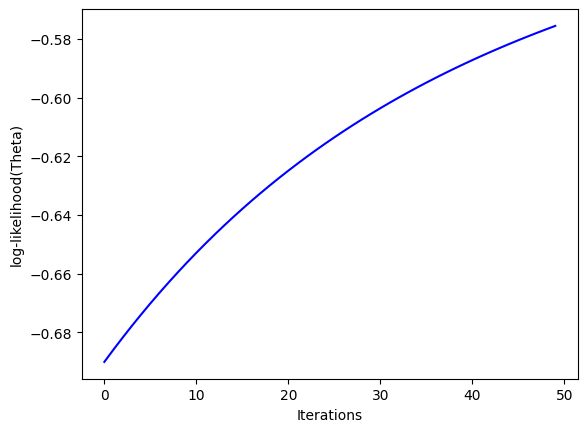
log-likelihood plot for alpha=0.05 and 50 iterations (fails to converge in time. It will converge but it will take much longer)

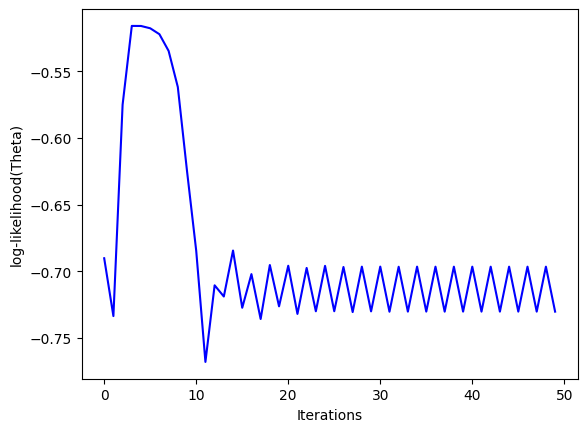
log-likelihood plot for alpha=15. Fails to converge and starts oscillating (for the reasons we said before)

-------------------------------------------------------

## 2: **Polynomial Expansion**

### **2.1: Polynomial features for logistic regression** 

Define new features e.g., of 2nd and 3rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). 
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=.3,
    random_state=89,
)
X = np.hstack([np.ones_like(X[:, [0]]), X])
X, X_val, y, y_val = train_test_split(X, y, test_size=200, random_state=42)

sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y)

In [ ]:
def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features matrix of shape (n_samples, 3) where the first column is the bias term
        degree: the degree of the polynomial

    Returns:YOUR
        X: the final polynomial features
    """
    if degree < 2:
        return X

    features = np.ones(X.shape[0])

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    for i in range(1, degree + 1):
        for j in range(i + 1):
            #print("x1^{} * x2^{}".format(i - j, j))
            features = np.column_stack((features, X[:, 1] ** (i - j) * X[:, 2] ** j))

    return features


**Do not write below this line just run it**

--------------------------------------------

In [ ]:
x_new_quad = get_polynomial(X, degree=2)
x_new_cubic = get_polynomial(X, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)

Now use the gradient ascent optimization algorithm to learn the models by maximizing the log-likelihood, both for the case of `x_new_quad` and `x_new_cubic`.


**Do not write below this line just run it**

--------------------------------------------

In [ ]:
n_iter = 50
model_lin = LogisticRegression(num_features=X.shape[1])
log_l_history,_ = fit(model_lin, X, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic features
model_quad = LogisticRegression(num_features=x_new_quad.shape[1])
log_l_history_quad,_ = fit(model_quad, x_new_quad, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic and cubic features
model_cubic = LogisticRegression(num_features=x_new_cubic.shape[1])
log_l_history_cubic,_ = fit(model_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter)

log_l = np.stack([log_l_history, log_l_history_quad, log_l_history_cubic])

log_l_df = pd.DataFrame(log_l.T, columns=["Linear", "Quadratic", "Cubic"])
sns.lineplot(data=log_l_df, markers=True).set(
    xlabel="Iterations", ylabel="Log Likelihood", title="Log Likelihood History for Different Models"
)

### **2.2: Plot the computed non-linear boundary** 

First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

In [ ]:
def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final theta
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """

    # Create a meshgrid for x1 and x2 values
    x1_vec, x2_vec = np.meshgrid(x1_vec, x2_vec)
    
    # Flatten the meshgrid to pass as input to get_polynomial
    X_flattened = np.c_[np.ones(x1_vec.size), x1_vec.ravel(), x2_vec.ravel()]

    # Transform the input data to the polynomial feature space
    X_poly = get_polynomial(X_flattened, degree=degree)

    # Compute the boundary function f
    f = X_poly @ theta_final

    return x1_vec, x2_vec, f

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

**Do not write below this line just run it**

--------------------------------------------

In [ ]:
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)
    mesh_shape = int(np.sqrt(f.shape[0]))

    sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, legend=False)
    plt.contour(
        x1_vec, x2_vec, f.reshape((mesh_shape, mesh_shape)), colors="red", levels=[0]
    )

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model_lin.parameters, degree=1)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,2)
plot_boundary_function(X, y, model_quad.parameters, degree=2)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,3)
plot_boundary_function(X, y, model_cubic.parameters, degree=3)
plt.title("Decision Boundary for Cubic Features");

**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy for $\texttt{degree} \geq 2$.

In [ ]:
from sklearn.preprocessing import normalize

def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps, architecture = LogisticRegression):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    X = normalize(X)
    X_test = normalize(X_test)

    thetas = []
    accuracy_scores_train, accuracy_scores_test = [], []
    for degree in tqdm(degrees):
        x_new = get_polynomial(X, degree=degree)

        model = architecture(num_features=x_new.shape[1])
        fit(model, x_new, y, lr=lr, num_steps=num_steps)    

        thetas.append(model.parameters)
        y_hat_train = model.predict(x_new) > 0.5
        accuracy_scores_train.append(accuracy_score(y, y_hat_train))
        y_hat_test = model.predict(get_polynomial(X_test, degree=degree)) > 0.5
        accuracy_scores_test.append(accuracy_score(y_test, y_hat_test))
        
    return thetas, accuracy_scores_train, accuracy_scores_test

In [ ]:
degrees = np.arange(1, 20)
np.random.seed(42)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    X, y, X_val, y_val, degrees=degrees, lr=0.5, num_steps=500, architecture=LogisticRegression
)
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test,  label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()

Plot the best and the worst decision boundaries for $\texttt{degree} \geq 2$.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [ ]:
# Plot worst model
worst_model_idx = np.argmin(accuracy_scores_test[1:])
degree = degrees[worst_model_idx + 1]


x_new = get_polynomial(X, degree=degree)
model = LogisticRegression(num_features=x_new.shape[1])
fit(model, x_new, y, lr=0.5, num_steps=500)  


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model.parameters, degree=degree)


In [ ]:
# Plot best model
best_model_idx = np.argmax(accuracy_scores_test[1:])
degree = degrees[best_model_idx + 1]


x_new = get_polynomial(X, degree=degree)
model = LogisticRegression(num_features=x_new.shape[1])
fit(model, x_new, y, lr=0.5, num_steps=500)  


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model.parameters, degree=degree)

#### **Report** 
Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer. 
3. In general what are some properties of the dataset that makes it more prone to overfitting? Discuss their impact.


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

### **Considerations on Polynomial Decision Boundaries and Model Complexity**

1. Examining the plots for linear, quadratic, and cubic decision boundaries, we can notice that:
   - **wtih degree = 1**: the decision boundary is a straight line, providing a basic separation between classes. It captures only the simplest relationships, which can lead to underfitting when data is non-linear or complex. In fact, in our case, as the classes are not linearly separable, this model performs poorly.
   - **wtih degree = 2**: the quadratic model is able to capture more complex patterns by introducing a curved boundary that better accommodates non-linear data. The performances of our model increases a lot compared to the linear one, it almost perfectly separates the two classes.
   - **with degree = 3**: the boundary curve is even more flexible, which on the one and enables further curvature that can fit more intricate structures in the data, on the other hand tho, it can lead to overfitting. In our case, the cubic model is able to separate the two classes even slightly better than the quadratic one, but it is likely to overfit the training data.

   Generally we can say that if we chose a too high polynomial degree, the model starts to capture noise rather than meaningful patterns, leading to poor generalization on new data (the model will have a high variance).

   **Underfitting**: It’s unlikely to encounter underfitting by increasing the degree further; instead, overfitting becomes a concern. As the degree rises, the model can fit the training data almost perfectly, but this high degree of flexibility often fails to generalize, reducing performance on test data. An overfitted model will on the one hand have a low bias, but on the other hand, a high variance. We should aim for a balance between bias and variance.

2. Training and Test Accuracy as a Function of Polynomial Degree
   - We can notice that the training accuracy reached its peak at degree 2, a huge improvement compared to the linear model. However, keeping to increase the degree further did not lead to additional improvements in accuracy, it instead got a little bit worse before stabilizing to a value. This behavior indicates that the quadratic model has already captured the main patterns in the data, and that further complexity is not beneficial.

   - We clearly see that testing accuracy tends to increase initially, peaks at an optimal degree, and then declines as the degree increases further, finally stabilizing at a value lower than the peak. This behavior is typical of overfitting, where the model captures noise rather than meaningful patterns. In our case, the best test accuracy is achieved at degree 2. Where the model captures essential patterns without overfitting noise. In contrast, we can observe that at degree 5 we get the worst test accuracy. By plotting the decision boundaries we can clearly see that the boundary in the worst model is much more complex curve that tries to fit the training data as closely as possible, this will lead to poor generalization on new data.

   It is not always desirable to have a very complex decision boundary, as it will likely lead to overfitting. The ideal polynomial degree is the one that captures the main patterns in the data without fitting noise, thus a balance between simplicity and complexity is desirable. A very high degree is usually not ideal for generalization.

3. Dataset Properties That Increase Overfitting Risks
Certain dataset characteristics tend to make overfitting more likely:
   - **High Dimensionality**: When datasets have many features relative to sample size, models can find spurious correlations or noise, leading to overfitting.
   - **Small Sample Size**: With fewer samples, a model is more prone to capture noise rather than general patterns.
   - **Noise in Labels or Features**: High noise introduces random variations that the model may interpret as genuine patterns, especially with higher polynomial degrees.
   - **Class Imbalance**: Imbalanced classes (when a class has many more data samples than the other) can cause a model to learn to fit the majority class better, potentially ignoring the minority class or overfitting to noise in the minority class.

   These properties exacerbate overfitting by causing the model to "memorize" rather than "learn", which degrades test accuracy. Employing regularization techniques, reducing model complexity, or increasing training data size (if possible, of course) can help with overfitting.



-------------------------------------------------------

### **2.4: Weight Penalization**

Look at how complicated the decision boundaries become as you increase the degree. Can we improve this and prevent overfitting?
When dealing with overfitting one frequent solution is to use a weigth penalization technique like L2 or L1 penalization. 

In our case we'll use L2 regularization. In this way the regularized likelihood will be:
$$
\texttt{Likelihood}_{reg}(\theta) = \texttt{Likelihood}(\theta) - \frac{\lambda}{2n} \sum^n_i \theta_i^2
$$
Thus we can derive the update rule as:
\begin{equation}
\theta_j:= \theta_j + \alpha( \frac{\partial l(\theta_j)}{\partial \theta_j} -  \frac{\partial}{\partial \theta_j} \left( \frac{\lambda}{2} \theta_j^2 \right ) )
\end{equation}

Calculating the second term of the update rule it's just a matter of analytically solving a simple gradient, do it, and then implement it by extending the `LogisticRegression` class:

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression_penalized.py`**

--------------------------------------------

In [ ]:
from libs.models import LogisticRegressionPenalized

In [ ]:
X,y = make_classification(
    n_samples=500, 
    n_features=100, 
    n_informative=50, 
    n_redundant=25, 
    n_classes=2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
np.random.seed(42)

lr = LogisticRegression(X.shape[1])
likelihood_history, val_loss_history = fit(lr, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

penalized_lt = LogisticRegressionPenalized(X.shape[1], 2)
pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

plt.figure(figsize=(8, 5))
plt.plot(-likelihood_history[2:], label="Train", color="violet")
plt.plot(val_loss_history[2:], label="Test", color='teal')
plt.plot(-pen_history[2:], label="Train - penalized", color="violet", linestyle="--")
plt.plot(pen_val_history[2:], label="Test - penalized", color="teal", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Non-penalized")
plt.legend()

Now, evaluate the Penalized Logistic Regression for each value of $\lambda \in [0,3]$ and find the one that performs the best: 

In [ ]:
lambdas = np.arange(0, 3, 0.1)
losses = []

for lambda_ in lambdas:
    ##############################################
    ###         COMPLETE THIS FOR-LOOP         ###
    ##############################################
    penalized_lt = LogisticRegressionPenalized(X.shape[1], lambda_)
    pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)
    losses.append(pen_val_history[-1])

if len(losses) > 0:
    sns.lineplot(x=lambdas, y=losses, label="Validation Loss").set(
        xlabel="Lambda", ylabel="Loss", title="Validation Loss vs Lambda"
    )
    print(f"Best lambda: {lambdas[np.argmin(losses)]}")

#### Report
Write now your considerations. In particular:
1. What happens when we use a non-penalized logistic regression?
2. Observe the plot of the Train and Validation losses in the penalized vs non penalized case. In which case is the Train loss better? Can you explain why?
3. What is the convergence rate? How is it influenced by the penalization?

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. When we use a non-penalized logistic regression (i.e., without regularization), the model has no constraint on the magnitude of the weights. As a result:
    - Without regularization, the model can fit the training data very closely, even capturing noise or random fluctuations. This leads to overfitting, where the model performs very well on the training data but poorly on unseen data (test set). The decision boundary can become very complex and overly adapted to the specificities of the training set, which reduces the generalization ability of the model.
    - The model can assign large values to the weights, leading to a more complicated decision boundary. This makes the model more flexible, but it can also make the model more sensitive to slight changes in the data. As the degree of the polynomial features increases, this effect becomes even more pronounced.
    - The lack of penalization means that features with higher numerical ranges can dominate the decision-making process, even if they don't carry the most important information for classification. This can cause the model to overemphasize less relevant features.

2. In the non-penalized model, the train loss is lower than the penalized model, this is because the non-penalized model will fit the training data more closely, but this will make the model capture noise and overfit the data. Talking about validation loss, we can clearly see that the penalized model performs better. The loss of the non-penalized model does actually start to increase after a certain iteration, this is a clear sign of overfitting.

3. The convergence rate refers to how quickly an algorithm approaches its optimal solution during training. In logistic regression, the convergence rate is influenced by factors like the learning rate, the complexity of the model, and penalization. In the context of regularization, as we are adding a penalty term to the loss function, the convergence rate can be influenced by the strength of the regularization parameter λ. Adding an L2 penalty typically helps stabilize the learning process, reducing oscillations or erratic behavior during training. In fact, in our case, we can see that looking at the graph above, the penalized model converges faster than the non-penalized one. We can in fact see that the training loss of the penalized model stabilizes after 75 iterations, while the training loss of the non-penalized model keeps decreasing. If we increase the number of iterations, we will see that the non-penalized model's train loss will converge, but much slower (for what we said before, the non-penalized model's loss will converge to a lower value).

In conclusion, we can say that penalization helps us to find a better trade-off between bias and variance. By adding a penalty term, regularization reduces the model's flexibility, which prevents overfitting and helps with generalization, thus reducing variance. However, this also introduces some bias by constraining the model from fitting the data too perfectly.

-------------------------------------------------------

## 3: **Multinomial Classification**

### **3.1: Softmax Regression Model**

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

\begin{align*}
L(\theta) = -\sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(p_{ik})
\end{align*}

\begin{align*}
Loss(\theta) = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(p_{ik})
\end{align*}

\begin{align*}
\nabla_{\theta} L(\theta) = -\sum_{i=1}^N \left(y_i - p_i\right) X_i
\end{align*}


### **3.2: Coding**

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

cifar_dir = "assets/cifar10"
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root=cifar_dir, train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root=cifar_dir, train=False, download=True, transform=transform
)

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded

# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_val = [img.reshape(-1).numpy() for img, _ in test_data]
X_val = np.array(X_val)
y_val = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_val)

*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

Now implement a classifier for Multinomial Classification using the `softmax` function. Again, implement it as a class with the methods:
- `predict`
- `predict_labels`
- `likelihood` *(Here you need to implement the Cross Entropy Loss)*
- `update_theta`
- `compute_gradient` to compute the Jacobian $\nabla$

Note that this this you don't need to reimplement the `fit()` function since the training loop you defined above works also for a Multinomial Classifier, provided that this is structured with the previously mentioned methods.

--------------------------------------------

**Fill in the code in `libs/models/multinomial.py` and `libs/math.py/softmax()`**

--------------------------------------------

In [ ]:
from libs.models import SoftmaxClassifier
from libs.optim import fit

--------------------------------------------

**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [ ]:
# Apply gradient descent to optimize theta
alpha = 0.01
iterations = 500
H, K = X_train.shape[1], 10  # number of features and number of classes
model = SoftmaxClassifier(num_features=H, num_classes=K)
loss_history, _ = fit(model, X_train, y_train_onehot, lr=alpha, num_steps=iterations)

# Make predictions on the training and test data
train_predictions = model.predict_labels(X_train)
test_predictions = model.predict_labels(X_val)

train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_val)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

### **3.3: Pipeline**
Now you're going to use `scikit-learn` library to build a pipeline of operations to redo everything we've done so far in the homework. First we have loaded the required modules and the penguins dataset.

---

Then here you'll build the pipeline. We need four items:
1. The Numerical Transformer, to handle the preprocessing of numerical columns, by:
    - Imputing missing values with their mean
    - Enrich the features with a 3-rd degree polynomial expansion
    - Scaling of the features to $\mu=0, \sigma=1$
2. The Categorical Transformer, to handle the preprocessing of categorical values, by:
    - Imputing the missing values with the most frequent value
    - Encode the features in a one-hot vector.
3. The Preprocessor: a ColumnTransformer that distributed the numerical columns to the numerical transformer and the categorical columns to the categorical tranformer.
4. The final Pipeline, which contains the preprocessor and the classfier of your choice (in this case `KNeighborsClassifier`)

In [ ]:
data = pd.read_csv('assets/train.csv')

X_train, X_val, y_train, y_val = train_test_split(data.drop('species', axis=1), data.species, test_size=0.2, random_state=42)

In [ ]:
numerical_cols = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']
categorical_cols = ['island', 'sex']

##############################################
###          FILL IN THIS CODE           #####
##############################################
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
## Import everything you need here
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler()
)

categoric_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='if_binary', handle_unknown='error')
)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categoric_transformer, categorical_cols)
], remainder='drop')

pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=4))
if len(pipe.named_steps)>0:
    display(pipe)

Now, we can use this pipeline to preprocess the input data and fit a classifier. Leveraging `scikit-learn`'s pipelines allows you to:
- Define the entire chain of operations in a structured way, which is especially useful for cleaning and transforming data.
- Separate the definition of operations from their execution, creating a clean and organized workflow.

This approach makes it easier to manage complex preprocessing steps while maintaining readability and clarity in your code.

In [ ]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

This is nice but can we improve it? In defining the pipeline you certainly used some fixed hyperparameters, for example the number of neighbors or the degree of the polynomial expansion.

First, let's look at the list of hyperparameters: 

In [ ]:
hparams = pipe.get_params()
for hp, val in hparams.items():
    if type(val) not in [int, float, str]:
        continue
    print(f"{hp}: {val}")

Some of these hyperparameters are set to their default values, while others are explicitly defined. However, any data scientist knows that hyperparameters should not be arbitrarily chosen; instead, they should be optimized through **Cross-Validation**.

We can leverage the compositionality of `scikit-learn` by incorporating the pipeline into a `GridSearchCV` class. This allows you to easily define a grid of parameters to val and automatically perform cross-validation over the combinations.

Choose at least 2 values for at least 3 hyperparameters. val their impact on the model and find the best combination.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'columntransformer__cat__onehotencoder__drop': [None, 'first', 'if_binary'],
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'columntransformer__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
}
# Set up GridSearchCV with cross-validation
pipe_cv = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

if pipe_cv is not None:
    pipe_cv.fit(X_train, y_train)

    print(f"Best score: {pipe_cv.best_score_}")
    for hp, val in pipe_cv.best_params_.items():
        print(f"{hp}: {val}")

`GridSearchCV` doesn't only find the best combination of hyperparmeters, but it also refits the model with the best hyperparameters it finds. Let's val this new model:

In [ ]:
y_pred = pipe_cv.predict(X_val)
print(classification_report(y_val, y_pred))

#### Report
1. How many combinations has your gridsearch tried?
2. Make a plot with the results of your hyperparameter grid
3. Do you notice any trend in the performance of certain hyperparameters?
4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.
5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

In [ ]:
cv_res = pd.DataFrame(pipe_cv.cv_results_)
cv_res.columns = [col.split('__')[-1] for col in cv_res.columns]


##############################################
###                YOUR CODE HERE         ####
##############################################

# Print the number of combinations tried
param_counts = [len(values) for values in param_grid.values()]
total_combinations = np.prod(param_counts)
print(f"1. Number of combinations tried: {total_combinations}")

# Print train and test accuracy
a_y_pred = pipe_cv.predict(X_train)
print("Train accuracy: ", accuracy_score(y_train, a_y_pred))
print("Test accuracy: ", accuracy_score(y_val, y_pred))

### Plot 1
This first plot shows the mean test score that the model obtained for each combination of hyperparameters.
Data is represented in the following way:
- The x-axis represents the n_neighbors parameter
- The color of the marker represents the degree of the polynomial expansion
- The shape of the marker represents the value of the drop parameter for the one hot encoding
    - Circle for drop=None (no drop of categories)
    - Square for drop='first' (the first category is dropped)
    - Triangle for drop='if_binary' (the first category is dropped if the category is binary)
- The y-axis represents the mean test score obtained by the models

In [ ]:
# Extract relevant columns
mean_test_scores = cv_res['mean_test_score']
neighbors = cv_res['n_neighbors']
degree = cv_res['degree']
total_drop_values = cv_res['drop'].unique()

# Define the markers, their size and their transparency (to help visualize the data)
markers = ['o', 's', '^']
sizes = [30, 40, 60]
alphas = [1, 0.5, 0.7]
marker_map = {val: markers[i % len(markers)] for i, val in enumerate(total_drop_values)}
size_map = {val: sizes[i % len(sizes)] for i, val in enumerate(total_drop_values)}
alpha_map = {val: alphas[i % len(alphas)] for i, val in enumerate(total_drop_values)}
print("onehotencoder__drop map to marker:", marker_map)

# Plot the results
plt.figure(figsize=(10, 6))
for val in total_drop_values:
    if val is not None:
        subset = cv_res[cv_res['drop'] == val]
    else:
        subset = cv_res[cv_res['drop'].isnull()]
    
    scatter = plt.scatter(subset['n_neighbors'], subset['mean_test_score'], c=subset['degree'], cmap='viridis', marker=marker_map[val], label=val, linewidth=0.5, alpha=alpha_map[val], s=size_map[val])

# Add the colorbar for the polynomial degree
norm = plt.Normalize(vmin=cv_res['degree'].min(), vmax=cv_res['degree'].max())
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=plt.gca(), label='polynomial degree')
cbar.set_ticks(cv_res['degree'].unique())


plt.xlabel('n_neighbors')
plt.ylabel('mean_test_score')
plt.title('Plot 1: Hyperparameter Grid Search Results')
plt.show()

### Plot 2
In this plot, we are averaging the mean score for each value of the n_neighbors parameter. This way we can show the trend of the accuracy as the n_neighbors parameter changes.

In [ ]:

# Group by 'n_neighbors' and calculate the mean of 'mean_test_score'
cv_res_mean = cv_res.groupby("n_neighbors")["mean_test_score"].mean().reset_index()

# Plot the mean values
plt.scatter(cv_res_mean["n_neighbors"], cv_res_mean["mean_test_score"], linewidth=0.5, alpha=0.6)
plt.xlabel("n_neighbors")
plt.ylabel("Mean Test Score")
plt.title("Plot 2: average mean_test_score per n_neighbors")
plt.show()


### Plot 3
In this plot, we are going to plot, for each combination of hyperparameters, the compute time it took to fit the model. This way we can see if there is a trade-off between accuracy and compute power.

In [ ]:
fit_time = cv_res['mean_fit_time']
accuracy = cv_res['mean_test_score']

# find the highest accuracy
best_accuracy = accuracy[np.argmax(accuracy)]

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(fit_time[accuracy < best_accuracy], accuracy[accuracy < best_accuracy], c='red')
plt.scatter(fit_time[accuracy == best_accuracy], accuracy[accuracy == best_accuracy], c='green')

plt.xlabel('Training Time (seconds)')
plt.ylabel('Mean Test Score')
plt.title('Trade-off between Accuracy and Compute Power')
plt.show()

# The green boints are the models that achieved the highest score

In [ ]:
# as we can see, more than a model achieves the best accuracy, so we want to pick the one that required the lowest training time.
# let's print the hyperparameters of the best model

best_accuracy_models = cv_res[accuracy == best_accuracy]
best_overall_model = best_accuracy_models[fit_time == np.min(fit_time[accuracy == best_accuracy])]

# Print the best overall model hyperparameters
print("Best overall model hyperparameters:")
for hp, val in best_overall_model.iloc[0].items():
    print(f"{hp}: {val}")

--------------------------------------------

**Write your answer below this line**

1. We tried a total of 180 combinations, testing the following values for the hyperparameters:
   - `kneighborsclassifier__n_neighbors`: [2, 3, 4, 5, 6, 7, 8, 9, 10]
   - `columntransformer__num__polynomialfeatures__degree`: [1, 2, 3, 4, 5, 6, 7]
   - `columntransformer__cat__onehotencoder__drop`: ['first', 'if_binary', None]

2. The plot is shown above.

3. Trend in the performance of certain hyperparameters:
   From the grid search results and the scatter plot, we can observe that the model achieved the best performance on the test set with the parameters `n_neighbors=8`, `degree=1`, and `drop='if_binary'`, achieving a mean test score of 80.1%. In our case, as the scoring metric for the GridSearchCV is accuracy, it means that these parameters are the ones that maximize the accuracy on our dataset. The mean test score is the average score obtained on the test set across all cross-validation folds.

   - **`n_neighbors`:** We can observe that, generally speaking (by looking at plot 2 and considering, for each value of n_neighbors, the average score obtained by varying the other two parameters), the score tends to increase up to n_neighbors=7 and then it stabilizes. Looking at plot 1 we can clearly see that best overall score is achieved with n_neighbors=8, with the other two parameters set to their optimal values.

   - **`polynomial degree`:** The model performs better when the polynomial degree (the degree of the polynomial features we created to augment the dataset) is 1, which means that no new polynomial features are added. We can clearly see from plot 1 that `polynomialfeatures__degree=1` outperforms in almost every case (the round marker is always at the top). As we try to increase the value, we can see that the performance on our dataset decreases, suggesting that increasing the polynomial degree adds unnecessary complexity, which leads to overfitting rather than improved performance.

   - **`onehotencoder drop` (OneHotEncoder):** One Hot Encoding is a technique used to convert categorical variables into a format that could be provided to machine learning algorithms, it transforms each category value into a binary vector witn n elements (with n equal to the number of categories). In a vector, only one element will be 1 (hot) and the others will be 0 (cold). The drop parameter specifies if and which category should be dropped to avoid issues with multicollinearity (the dummy variable trap). This is very useful for models that assume independence among features.
   In our case, the best performance is achieved when drop='if_binary', which tells the encoder to drop the first category in each feature with two categories.
   Looking at the plot, we can see that drop='if_binary' (the triangle marker) achieves the best performance in most cases, suggesting that there is some multicollinearity in the dataset. In fact, if we look at the train.csv file (the dataset used), we can see that 'sex' is a binary feature (it has two categories, and it is clear that if one is 1, the other is 0. Leaving them both in the dataset would lead to multicollinearity, which can cause issues with the model's performance. The other categorical feature is 'island' which has 3 categories, if we drop the first one, we are losing information. This is why with drop='first' the model tends to perform worse in the majority of cases (in the plot, the square marker is always at the bottom of the other markers with the same color).


4. The accuracy on the train set is 82.6%, while the accuracy on the eval set is 80.4%. The differenct not big and it does not indicate that some strong overfitting is happening. When the gap between the train and test set is small, it means that the model generalizes well. Obtaining the same exact accuracy on both the train and test set is typically not achievable, especially in real world scenarios.

5. In our plot (plot 3), the green point represent the model that achieved the best mean_test_score. To answer the question, yes, there is a very slight trade-off between accuracy and compute power, but it's very subtle. The difference in computational power (in term of execution time) between the most complex and the simplest model is very small. We ran the training 10 times for each model, and averaged the execution time to get a more reliable estimate. In our test, the system toom about 5ms to train the simplest model, and 30ms to train the most complex one. We can definitely say that there is a difference, as the most complex model took about 6 times longer to train, but the difference is extremely small, also because our dataset was very small. With a much bigger dataset the difference would probably have been more evident.
The model that ahieved the best accuracy took about 17ms to train, which is in the average between the two extremes. This suggests that increasing the model's complexity initially does give an improvement in the model's performance, but if we keep increasing the complexity, the model will start to overfit the training data, which will lead to a decrease in performance on the test set. The best model is the one that finds the right balance between complexity and simplicity.

--------------------------------------------

## **4: Debugging a CNN with Shape Errors**

You are provided with a CNN model intended to classify images from the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. However, the model contains shape mismatches between layers due to intentional errors. Your first task is to identify and fix these errors to make the model functional.*testo in corsivo*

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

### 4.1: Split the CIFAR-10 Dataset

Instructions:

* Define the Split Sizes:
Calculate the sizes for the training and validation datasets. Allocate ***80% of the training*** data for the training set and *20% for the validation set*.

* Split the Dataset:
Use `torch.utils.data.random_split` to create the training and validation datasets from the original training dataset.

* Create Data Loaders:
Create data loaders for the training, validation, and test datasets using torch.utils.data.DataLoader with a ***batch size of 64***. Ensure that the training data is ***shuffled***.

* Print the size of each dataset (train, test, val)

In [ ]:

# Define transformations for the data that we will use
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#####################################################
##              YOUR CODE HERE                     ##
#####################################################

import torch.utils.data as data_utils
# use these names for the data loaders

train_dataset, validation_dataset = data_utils.random_split(full_train_dataset, [0.8, 0.2])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

print(f"Full dataset size: {len(full_train_dataset)}")
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Validation dataset size: {len(validation_dataset)}")


### 4.2: Identify and Correct Errors in the CNN Model


In this exercise, you will analyze an intentionally incorrect implementation of a Convolutional Neural Network model. Your task is to identify the errors in the `PoorPerformingCNN` class and correct them to ensure the model works properly for the CIFAR-10 dataset.

--------------------------------------------

**Fill in the code in `libs/models/poor_cnn.py**

--------------------------------------------

In [ ]:
from libs.models import PoorPerformingCNN

net = PoorPerformingCNN()

Loss Function and optimizer

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4.3: Training procedure

In this exercise, you will complete the training and validation loop of a neural network model. Your task is to compute and store the average training loss, average validation loss, and the corresponding accuracies for each epoch.

Instructions:

* **Training Phase**:
After computing the average training loss (avg_train_loss), you need to calculate the training accuracy based on the model's predictions and append the calculated training accuracy to the train_accuracies list.

* **Validation Phase**:
After calculating the average validation loss (avg_val_loss), you need to calculate the validation accuracy based on the validation dataset and append the calculated validation accuracy to the val_accuracies list. (the same as befor but for the val)

In [ ]:
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################
    
    # After computing the average training loss (avg_train_loss), you need to calculate the training accuracy based on the model's predictions and append the calculated training accuracy to the train_accuracies list.
    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate training accuracy
    y_pred = torch.max(outputs.data, 1)
    train_accuracy = (y_pred.indices == labels).sum().item() / len(labels)
    train_accuracies.append(train_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Calculate accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            total += val_labels.size(0)
            correct += (val_predicted == val_labels).sum().item()


    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate validation accuracy
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')


### 4.4: Evaluate

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        #####################################################
        ##              YOUR CODE HERE                     ##
        #####################################################

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        #####################################################
        ##              END OF YOUR CODE                   ##
        #####################################################

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

### 4.5: Report

1. What challenges can class imbalance introduce when training a machine learning model?

2. What are some strategies to address class imbalance in your dataset or training process?

3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance

4. Is the cifar-10 and imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. Class imbalance can be especially problematic in machine learning because many algorithms assume that the number of samples in each class is approximately equal. When there’s a large imbalance, the model may learn to "ignore" the minority class, resulting in poor performance on that class and an inaccurate evaluation of the model's true capabilities. Another challenge introduced by imbalance is overfitting, infact the model may overfit to the majority class, learning its patterns too closely and failing to generalize to unseen data, especially for the minority class.
There is high false negative rate challenge beacuse the model may mistakenly classify instances of the minority class as belonging to the majority class, leading to missed opportunities or incorrect decisions. 
2. In order to address class imbalance in a dataset we can do:
    * **Data augmentation**: If working with images, text, or time series data, this technique  can create additional samples for the minority class, providing more training examples.

    * **Resampling**:
        * **Oversampling**: increasing the number of samples in the minority class to balance the dataset. This can be done by duplicating existing minority samples or generating synthetic samples.
        It is best suited for situations where the minority class is too small and it works well with relatively small datasets, where adding more data is advantageous for training.
        * **Undersampling**: reducing the number of samples in the majority class to balance it with the minority class. This can help models focus on meaningful differences between classes but may result in data loss.
        It is suited for large datasets where reducing the number of majority samples doesn’t cause significant information loss and it is useful in cases where the majority class is extremely large relative to the minority class, as undersampling can reduce dataset size and speed up training.
    * **Class Weights**: rather than modifying the dataset, this strategy adjust the training process so that the model "pays more attention" to the minority class by penalizing misclassifications more heavily. It modifies the loss function by assigning higher weights to errors involving the minority class, making those errors contribute more to the total loss. This helps the model learn the minority class patterns more effectively without needing additional samples.
3. Accuracy alone can be misleading because it doesn’t account for how well the model performs on each individual class—particularly the minority class, which is often the focus in imbalanced datasets.
The problem is that the majority class makes up a large portion of the data, so a model can achieve high accuracy simply by correctly predicting the majority class. For instance, in a dataset with 95% majority class and 5% minority class, a model that always predicts the majority class will still achieve 95% accuracy, so the model could have a high rate of false negatives (failing to identify minority class instances) while still achieving high accuracy.
In order to address the above described problem, we should to look at metrics that provide insights into each class like F1 Score, Recall, ROC-AUC ecc...
4. It is a balanced dataset, ifconsists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.The training batches contain exactly 5000 images from each class.

-------------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load again the CIFAR-10 training dataset (just to avoid problems with the previous split)
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get the labels for the training data
train_labels = np.array(full_train_dataset.targets)

# CIFAR-10 class labels
class_labels = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Count the number of samples for each class
class_counts = np.bincount(train_labels)

# Plotting the number of samples for each class
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts, color='green')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Number of Samples for Each Class in CIFAR-10 Dataset")
plt.show()

## **5: Improve the accuracy** (BONUS)

### 5.1: Custom model

After successfully debugging the model, you'll notice that the accuracy on the CIFAR-10 dataset is only around 50-60%. Your second task is to improve the model's performance.

How?

*   Add more convolutional layers to capture higher-level features.
*   Use Batch Normalization
*   Add Dropout Layers

Data Augmentation:
*   Apply transformations like random cropping, flipping, and rotation.

Hint: You CAN implement already pre-existing CNN architectures (do your research). As long as it is a CNN everything is fine.

By the end of this section you should return the accuracy of your model on the test dataset.

NB: by better score we mean at least +10% with respect to the previous model.





In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define transformations for the data
transform = transforms.Compose([
        transforms.RandomRotation(15),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


--------------------------------------------

**Fill in the code in `libs/models/custom_cnn.py**

--------------------------------------------

In [ ]:
from libs.models import CustomCNN

net = CustomCNN().to(device)

#### Training

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')


#### Evaluation

In [ ]:
# Evaluate the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')


### 5.2: Pretrained network
In this exercise, you will start from scratch to adapt a pre-trained AlexNet model for the CIFAR-10 dataset.

Instructions

- Use torchvision.models to load a pre-trained AlexNet. Be sure to specify that the model should be pre-trained on ImageNet.

- The CIFAR-10 dataset has 10 classes, so you need to update the model’s final layer to output 10 classes instead of the default 1000.

- Replace the final fully connected layer in AlexNet’s classifier to output 10 classes.

- To perform fine-tuning, freeze all layers except the newly added fully connected layer.

- Move your model to the appropriate device (cuda if available). Define a device and ensure the model is moved to that device.


In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:

#####################################################
##              YOUR CODE HERE                     ##
#####################################################
import torchvision

model = torchvision.models.alexnet(weights='IMAGENET1K_V1')
model.classifier[6] = nn.Linear(4096, 10)
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier[6].parameters():
    param.requires_grad = True


#####################################################
##              END OF YOUR CODE                   ##
#####################################################
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')